In [2]:
import os
import mat73
import numpy as np
import pandas as pd

# Define the selected channels and their names
selected_channels = [37, 30, 47, 12, 49, 14, 51]
channel_names = {'37': 'Fz', '30': 'Pz', '47': 'Cz', '12': 'C3', '49': 'C4', '14': 'T7', '51': 'T8'}

# Function to process data for each subject
def process_subject(subject_dir):
    # Load data for the subject
    data_dict = mat73.loadmat(os.path.join(subject_dir, 'erp_v1.mat'))
    erp_data = data_dict['erp']
    log_data = data_dict['log']
    
    # Extract EEG signals for selected channels
    selected_erp = erp_data[selected_channels]

    # Prepare features
    features = []
    for i in range(selected_erp.shape[2]):  # Iterate over trials
        for j in range(selected_erp.shape[1]):  # Iterate over time samples
            # Get EEG signal values for the current time sample
            eeg_values = selected_erp[:, j, i]
            # Get smell ID
            smell_id = log_data[i, 1]
            # Get subject
            subject = os.path.basename(subject_dir)
            # Get trial number
            trial_no = i + 1
            # Append features to the list
            features.append(list(eeg_values) + [smell_id, subject, trial_no] + [channel_names[str(ch)] for ch in selected_channels])

    return features

# Function to process data for all subjects
def process_all_subjects(data_dir):
    all_features = []
    # Iterate over subject directories
    for subject in os.listdir(data_dir):
        subject_dir = os.path.join(data_dir, subject)
        # Process data for the current subject
        features = process_subject(subject_dir)
        all_features.extend(features)
    
    return all_features

# Define the data directory
data_dir = r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG"
# Process data for all subjects
all_features = process_all_subjects(data_dir)

# Create a DataFrame from the features
columns = [f"channel_{ch}" for ch in selected_channels] + ['smell_id', 'subject', 'trial_no'] + [f"channel_name_{ch}" for ch in selected_channels]
df = pd.DataFrame(all_features, columns=columns)

# Define the output directory
output_dir = r"C:\Users\Aryan\Documents\MATLAB\smell eeg"
# Save DataFrame to CSV in the output directory
output_csv_path = os.path.join(output_dir, 'eeg_features.csv')
df.to_csv(output_csv_path, index=False)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\processed_csv.csv\erp_v1.mat', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [1]:
file_path = r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\biosemi64.ced"

try:
    with open(file_path, 'r') as file:
        file_contents = file.read()
        print(file_contents)
except FileNotFoundError:
    print("File not found or path is incorrect.")
except Exception as e:
    print("An error occurred:", e)


Number	labels	type	theta	radius	X	Y	Z	sph_theta	sph_phi	sph_radius	urchan	ref	datachan	
1	Fp1		-17.9	0.515	80.8	26.1	 -4	17.9	-2.7	 85	  1		  1	
2	AF7		-35.9	0.522	68.7	49.7	-5.96	35.9	-4.02	 85	  2		  1	
3	AF3		-22.5	0.421	76.2	31.5	20.8	22.5	14.2	 85	  3		  1	
4	F1		-23.5	0.279	59.9	 26	54.4	23.5	39.8	 85	  4		  1	
5	F3		-39.9	0.345	57.6	48.2	39.9	39.9	 28	 85	  5		  1	
6	F5		-49.4	0.432	 54	63.1	18.1	49.4	12.3	 85	  6		  1	
7	F7		-53.9	0.528	49.9	68.4	-7.49	53.9	-5.06	 85	  7		  1	
8	FT7		-71.9	0.532	26.2	80.4	-8.51	71.9	-5.75	 85	  8		  1	
9	FC5		-69.3	0.408	28.8	76.2	24.2	69.3	16.5	 85	  9		  1	
10	FC3		-62.4	0.288	 31	59.3	52.5	62.4	38.1	 85	 10		  1	
11	FC1		-44.9	0.181	32.4	32.4	71.6	44.9	57.4	 85	 11		  1	
12	C1		-90	0.133	2.11e-15	34.5	77.7	 90	 66	 85	 12		  1	
13	C3		-90	0.267	3.87e-15	63.2	56.9	 90	 42	 85	 13		  1	
14	C5		-90	0.4	4.95e-15	80.8	26.3	 90	 18	 85	 14		  1	
15	T7		-90	0.533	5.18e-15	84.5	-8.85	 90	-5.97	 85	 15		  1	
16	TP7		-108	0.532	-26.2	80.4	-8.51	108	-5

In [27]:
# File path
file_path = r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\biosemi64.ced"

# Initialize an empty list to store the numbers
numbers = []

# Open the file and read its contents
with open(file_path, 'r') as file:
    # Skip the first line (header)
    next(file)
    # Iterate through each line in the file
    for line in file:
        # Split the line by whitespace and get the number (first column)
        number = int(line.split()[0])
        # Append the number to the list
        numbers.append(number)

# Print the extracted numbers
print(numbers)




[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]


Creating RawArray with float64 data, n_channels=64, n_times=2701
    Range : 0 ... 2700 =      0.000 ...     5.400 secs
Ready.


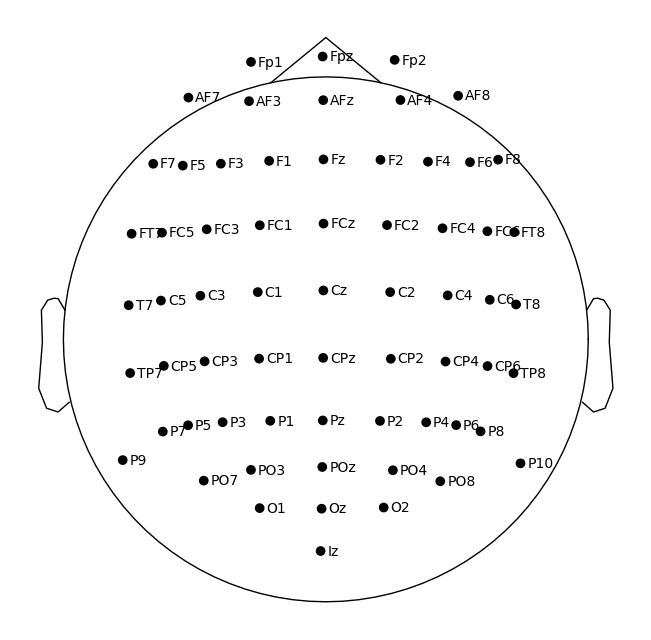

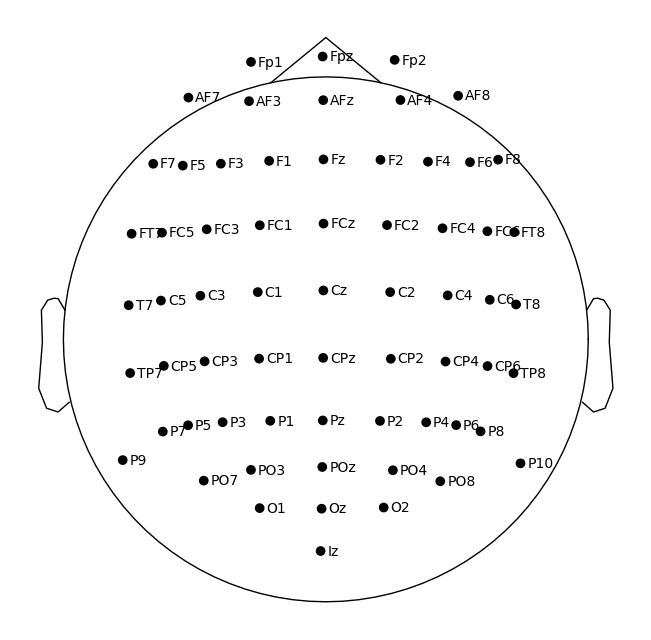

In [4]:
import mne
import numpy as np
import h5py

# Load the .mat file
with h5py.File(r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01\erp_v1.mat", 'r') as file:
    eeg_data = np.array(file['erp'])

# Create an info structure for the first 64 channels
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Create the raw object for the first trial with the first 64 channels
raw = mne.io.RawArray(eeg_data[:64, :, 0], info)


# Set the montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Plot the locations
raw.plot_sensors(show_names=True)


Creating RawArray with float64 data, n_channels=64, n_times=2701
    Range : 0 ... 2700 =      0.000 ...     5.400 secs
Ready.


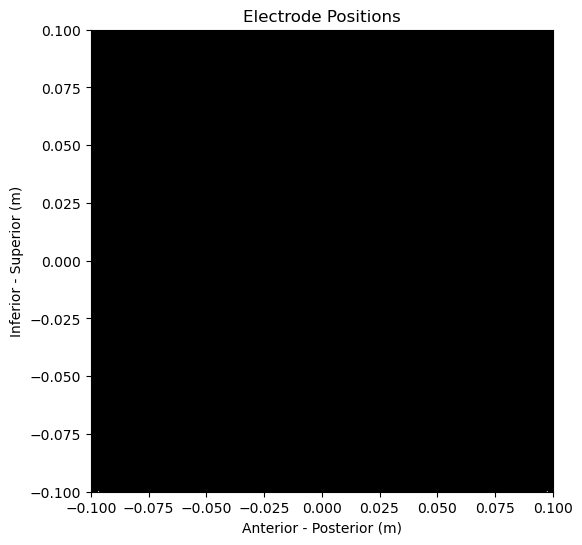

AttributeError: No mne.time_frequency attribute psd_multitaper

In [13]:
import mne
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

# Load the .mat file
with h5py.File(r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01\erp_v1.mat", 'r') as file:
    eeg_data = np.array(file['erp'])

# Create an info structure for the first 64 channels
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Create the raw object for the first trial with the first 64 channels
raw = mne.io.RawArray(eeg_data[:64, :, 0], info)

# Set the montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Get channel positions
ch_pos = raw.get_montage().get_positions()

elec_img = np.zeros((512, 512))
for pos in ch_pos.values():
    if isinstance(pos, (list, np.ndarray)) and len(pos) >= 2:  # Check if pos is array-like and has at least two elements
        x, y = pos[:2]  # Extract first two coordinates
        elec_img[int(x * 100), int(y * 100)] = 1  # Scale coordinates and set pixel value

# Plot electrode positions
plt.figure(figsize=(6, 6))
plt.imshow(elec_img.T, origin='lower', extent=(-0.1, 0.1, -0.1, 0.1), cmap='gray')
plt.title('Electrode Positions')
plt.xlabel('Anterior - Posterior (m)')
plt.ylabel('Inferior - Superior (m)')
plt.grid(False)
plt.show()




# Compute PSD
psds, freqs = mne.time_frequency.psd_multitaper(raw, fmin=1, fmax=50, n_jobs=1)

# Normalize PSD values
psds_norm = (psds - np.min(psds)) / (np.max(psds) - np.min(psds))

# Gaussian smoothing
smoothed_psds = gaussian_filter(psds_norm, sigma=3)

# Plot PSD values
plt.figure(figsize=(8, 6))
plt.imshow(psds_norm, aspect='auto', cmap='jet', extent=[0, 512, 0, 512])
plt.colorbar(label='Normalized PSD')
plt.title('Normalized PSD Values')
plt.show()

# Plot smoothed PSD values
plt.figure(figsize=(8, 6))
plt.imshow(smoothed_psds, aspect='auto', cmap='jet', extent=[0, 512, 0, 512])
plt.colorbar(label='Smoothed PSD')
plt.title('Smoothed PSD Values')
plt.show()


In [14]:
pip install mne

Note: you may need to restart the kernel to use updated packages.


In [15]:
import mne
print(mne.__version__)


1.6.1


Creating RawArray with float64 data, n_channels=64, n_times=2701
    Range : 0 ... 2700 =      0.000 ...     5.400 secs
Ready.


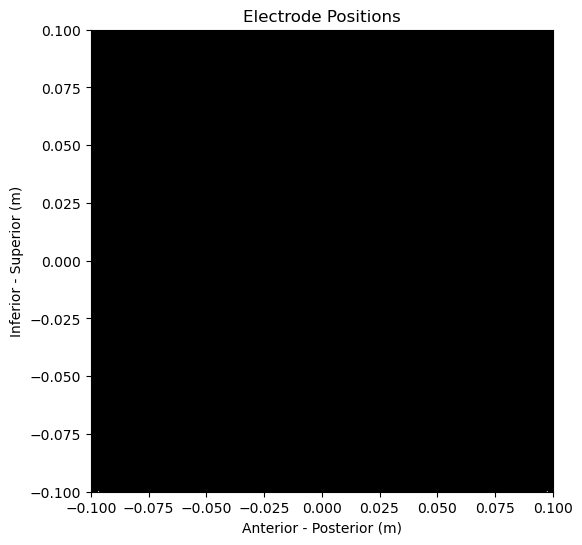

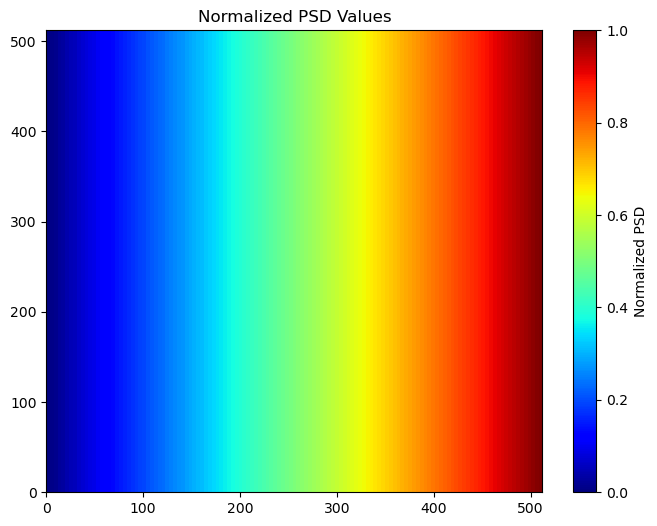

TypeError: Invalid shape (129,) for image data

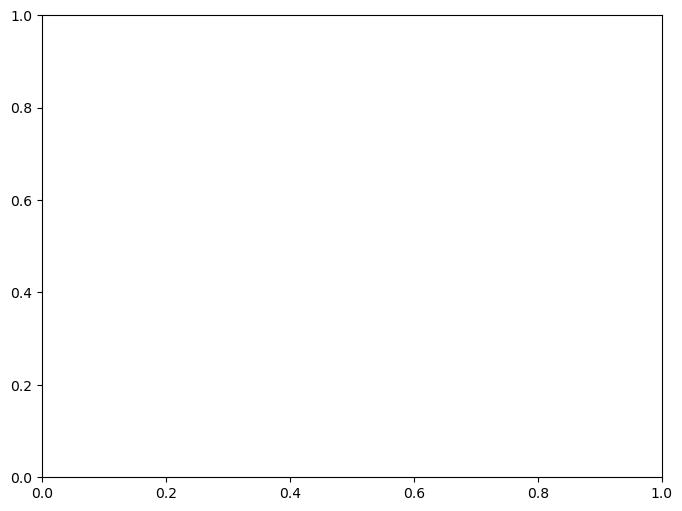

In [31]:
import mne
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import welch

# Load the .mat file
with h5py.File(r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01\erp_v1.mat", 'r') as file:
    eeg_data = np.array(file['erp'])

# Create an info structure for the first 64 channels
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Create the raw object for the first trial with the first 64 channels
raw = mne.io.RawArray(eeg_data[:64, :, 0], info)

# Set the montage
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

# Get channel positions
ch_pos = raw.get_montage().get_positions()

elec_img = np.zeros((512, 512))
for pos in ch_pos.values():
    if isinstance(pos, (list, np.ndarray)) and len(pos) >= 2:  # Check if pos is array-like and has at least two elements
        x, y = pos[:2]  # Extract first two coordinates
        elec_img[int(x * 100), int(y * 100)] = 1  # Scale coordinates and set pixel value

# Plot electrode positions
plt.figure(figsize=(6, 6))
plt.imshow(elec_img.T, origin='lower', extent=(-0.1, 0.1, -0.1, 0.1), cmap='gray')
plt.title('Electrode Positions')
plt.xlabel('Anterior - Posterior (m)')
plt.ylabel('Inferior - Superior (m)')
plt.grid(False)
plt.show()

# Compute PSD using Welch's method
psds, freqs = welch(raw._data, fs=500, nperseg=256)

# Normalize PSD values
psds_norm = (psds - np.min(psds)) / (np.max(psds) - np.min(psds))

# Reshape psds_norm to 2D array
psds_norm_2d = np.expand_dims(psds_norm, axis=0)

# Plot PSD values
plt.figure(figsize=(8, 6))
plt.imshow(psds_norm_2d, aspect='auto', cmap='jet', extent=[0, 512, 0, 512])
plt.colorbar(label='Normalized PSD')
plt.title('Normalized PSD Values')
plt.show()

# Gaussian smoothing
smoothed_psds = gaussian_filter(psds_norm, sigma=3)

# Plot smoothed PSD values
plt.figure(figsize=(8, 6))
plt.imshow(smoothed_psds, aspect='auto', cmap='jet', extent=[0, 512, 0, 512])
plt.colorbar(label='Smoothed PSD')
plt.title('Smoothed PSD Values')
plt.show()


In [19]:
import mne
print(mne.__version__)


1.6.1


In [20]:
# Extract sensor locations from info structure
sensor_pos = raw.info['chs'][:64]  # Assuming the first 64 channels are EEG channels

# Get the coordinates of each sensor
sensor_coords = np.array([ch['loc'][:3] for ch in sensor_pos])

# Print the coordinates
print(sensor_coords)


[[-0.03090259  0.11458518  0.02786657]
 [-0.05636066  0.09915152  0.02514129]
 [-0.03518601  0.10912957  0.05643921]
 [-0.02904395  0.09144848  0.09661865]
 [-0.05180904  0.0866879   0.07871409]
 [-0.06605408  0.08023978  0.05377108]
 [-0.07187663  0.07310353  0.02579046]
 [-0.08248931  0.04484874  0.02768058]
 [-0.07890598  0.05136738  0.06296235]
 [-0.06185234  0.05713329  0.09376583]
 [-0.03571586  0.06171406  0.11798302]
 [-0.03793782  0.02633745  0.12977061]
 [-0.06714872  0.02335823  0.10451068]
 [-0.0820853   0.01929363  0.06948967]
 [-0.08598208  0.01487164  0.03117337]
 [-0.08675728 -0.01495098  0.03515866]
 [-0.08151351 -0.01334569  0.07313263]
 [-0.06547223 -0.0118966   0.10777792]
 [-0.03742513 -0.01082424  0.13344371]
 [-0.03065362 -0.04492739  0.11947205]
 [-0.05503823 -0.0442103   0.09990898]
 [-0.06929984 -0.04322697  0.0722538 ]
 [-0.07445796 -0.04212316  0.04127363]
 [-0.07504185 -0.04461433  0.00284215]
 [-0.05694862 -0.06592325  0.04790744]
 [-0.0386246  -0.06736158

In [28]:
# Provided list of numbers
numbers = [21, 22, 32, 23, 10, 27, 12, 44, 35, 46, 36, 57, 51, 66, 69, 8, 2, 121, 123, 116, 111, 107, 103, 97, 86, 95, 91, 61, 76, 82, 74]

# Get the length of the list
length = len(numbers)

# Print the length
print("Length of the list:", length)


Length of the list: 31


In [29]:
# Assuming labels is a list containing the labels extracted from your data
labels = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']

selected_channels = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']

# Write index values for selected channels
index_values = {}
for channel in selected_channels:
    index = labels.index(channel)
    index_values[channel] = index

# Print index values
for channel, index in index_values.items():
    print(f"Index value for '{channel}': {index}")


Index value for 'Fp1': 0
Index value for 'AF7': 1
Index value for 'AF3': 2
Index value for 'F1': 3
Index value for 'F3': 4
Index value for 'F5': 5
Index value for 'F7': 6
Index value for 'FT7': 7
Index value for 'FC5': 8
Index value for 'FC3': 9
Index value for 'FC1': 10
Index value for 'C1': 11
Index value for 'C3': 12
Index value for 'C5': 13
Index value for 'T7': 14
Index value for 'TP7': 15
Index value for 'CP5': 16
Index value for 'CP3': 17
Index value for 'CP1': 18
Index value for 'P1': 19
Index value for 'P3': 20
Index value for 'P5': 21
Index value for 'P7': 22
Index value for 'P9': 23
Index value for 'PO7': 24
Index value for 'PO3': 25
Index value for 'O1': 26
Index value for 'Iz': 27
Index value for 'Oz': 28
Index value for 'POz': 29
Index value for 'Pz': 30
Index value for 'CPz': 31
Index value for 'Fpz': 32
Index value for 'Fp2': 33
Index value for 'AF8': 34
Index value for 'AF4': 35
Index value for 'AFz': 36
Index value for 'Fz': 37
Index value for 'F2': 38
Index value for

In [32]:
import mne
import numpy as np
import h5py

# Load the .mat file
with h5py.File(r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01\erp_v1.mat", 'r') as file:
    eeg_data = np.array(file['erp'])

# Define channel names
ch_names = ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7',
            'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz',
            'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz',
            'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4',
            'O2']

# Create an info structure
info = mne.create_info(
    ch_names=ch_names,  # Use the modified channel names
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Print the info to verify the channel names
print(info)


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 64 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 64
 projs: []
 sfreq: 500.0 Hz
>


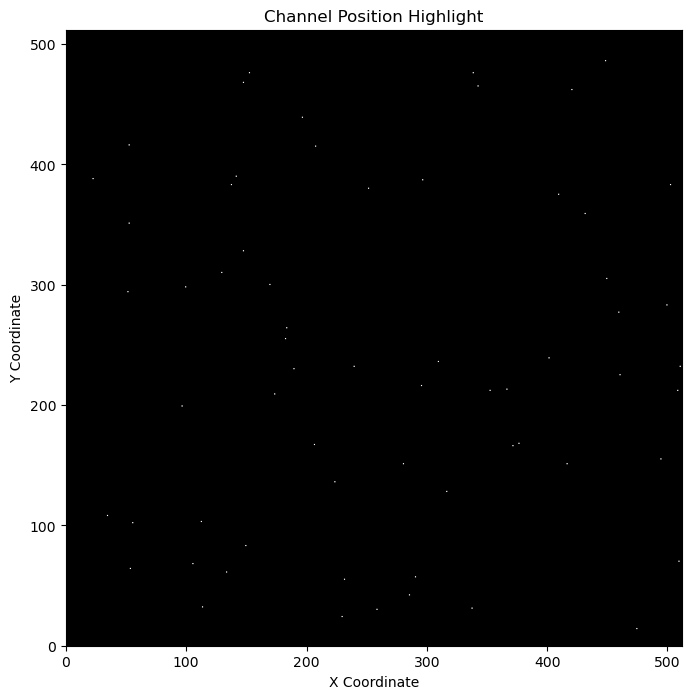

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import mne

# Create an example info structure (replace this with your actual info structure)
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Set random positions for each channel (replace this with actual channel positions)
channel_positions = np.random.rand(len(info['ch_names']), 2)

# Create a 512x512 image array
image = np.zeros((512, 512))

# Scale channel positions to fit the image size
scaled_positions = channel_positions * 512

# Highlight pixels at channel positions
for pos in scaled_positions:
    x, y = pos.astype(int)
    image[x, y] = 1

# Plot the image
plt.figure(figsize=(8, 8))
plt.imshow(image, cmap='gray', origin='lower', extent=(0, 512, 0, 512))
plt.title('Channel Position Highlight')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


Channel names: ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']
Keys in ch_pos: dict_keys(['ch_pos', 'coord_frame', 'nasion', 'lpa', 'rpa', 'hsp', 'hpi'])


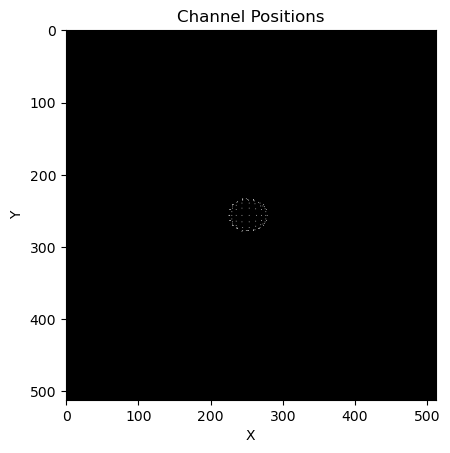

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from scipy.ndimage import gaussian_filter

# Example PSD values (replace this with your actual PSD values)
psd_values = np.random.rand(64)

# Create an example info structure (replace this with your actual info structure)
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Get channel positions from the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
ch_pos = montage.get_positions()

# Print channel names and keys in ch_pos
print("Channel names:", info['ch_names'])
print("Keys in ch_pos:", ch_pos.keys())

# Extract channel positions
ch_pos_array = np.array(list(ch_pos['ch_pos'].values()))

# Scale channel positions to fit the image size
scaled_positions = (ch_pos_array[:, :2] * 256 + 256).astype(int)  # Scale positions to fit within [0, 512]


# Create a 512x512 image array
image = np.zeros((512, 512))

# Map channel positions onto the image
for x, y in scaled_positions:
    image[x, y] = 1  # Highlight pixel corresponding to the channel position

# Show the image
plt.imshow(image, cmap='gray')
plt.title('Channel Positions')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()



In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
from scipy.signal import welch
import mne

# Load the .mat file and create the info structure for the channels
# Replace the file path with your actual file path
with h5py.File(r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01\erp_v1.mat", 'r') as file:
    eeg_data = np.array(file['erp'])

# Create an info structure for the first 64 channels
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Compute PSD using Welch's method for each channel
psds, freqs = welch(eeg_data, fs=info['sfreq'], nperseg=min(256, len(eeg_data[0])))

# Normalize PSD values
psds_norm = (psds - np.min(psds)) / (np.max(psds) - np.min(psds))

# Apply Gaussian smoothing to the normalized PSD values
smoothed_psds = gaussian_filter(psds_norm, sigma=3)

# Get channel positions from the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
ch_pos = montage.get_positions()

# Extract channel positions
ch_pos_array = np.array([ch_pos[ch] for ch in info['ch_names']])

# Scale channel positions to fit the image size
scaled_positions = (ch_pos_array[:, :2] * 256 + 256).astype(int)

# Create a 512x512 image array for PSD values
image_psd = np.zeros((512, 512))

# Map PSD values onto the image
for i, (x, y) in enumerate(scaled_positions):
    image_psd[x, y] = psds_norm[i]  # Map normalized PSD value to pixel

# Create a 512x512 image array for smoothed PSD values
image_smoothed_psd = np.zeros((512, 512))

# Map smoothed PSD values onto the image
for i, (x, y) in enumerate(scaled_positions):
    image_smoothed_psd[x, y] = smoothed_psds[i]  # Map smoothed PSD value to pixel

# Plot the PSD values as an image
plt.figure(figsize=(8, 6))
plt.imshow(image_psd, aspect='auto', cmap='jet')
plt.colorbar(label='Normalized PSD')
plt.title('PSD Values')
plt.show()

# Plot the smoothed PSD values as an image
plt.figure(figsize=(8, 6))
plt.imshow(image_smoothed_psd, aspect='auto', cmap='jet')
plt.colorbar(label='Smoothed PSD')
plt.title('Smoothed PSD Values')
plt.show()


KeyError: 'Fp1'

In [48]:
# Load the .mat file and create the info structure for the channels
# Replace the file path with your actual file path
with h5py.File(r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01\erp_v1.mat", 'r') as file:
    eeg_data = np.array(file['erp'])

# Create an info structure for the first 64 channels
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Get channel positions from the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
ch_pos = montage.get_positions()

# Print the keys in ch_pos
print("Keys in ch_pos:", ch_pos.keys())

# Print the channel names in info
print("Channel names:", info['ch_names'])


Keys in ch_pos: dict_keys(['ch_pos', 'coord_frame', 'nasion', 'lpa', 'rpa', 'hsp', 'hpi'])
Channel names: ['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2']


In [50]:
import mne
import numpy as np
import h5py
import matplotlib.pyplot as plt

# Load the .mat file
with h5py.File(r"C:\Users\Aryan\Documents\MATLAB\Kato_et_al - Copy\Kato_et_al\ProcData\EEG\KM26_s01\erp_v1.mat", 'r') as file:
    eeg_data = np.array(file['erp'])

# Create an info structure for the channels
info = mne.create_info(
    ch_names=['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2'],
    ch_types='eeg',
    sfreq=500  # Sample rate
)

# Get channel positions from the standard 10-20 montage
montage = mne.channels.make_standard_montage('standard_1020')
ch_pos = montage.get_positions()

# Scale channel positions to fit the image size
scaled_positions = (np.array(ch_pos['ch_pos'])[:, :2] * 256 + 256).astype(int)

# Create a 512x512 image array
image = np.zeros((512, 512))

# Plot channel positions on the image
for x, y in scaled_positions:
    image[y, x] = 1  # Set pixel value to 1 for each channel position

# Display the image
plt.imshow(image, cmap='gray')
plt.title('Channel Positions')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


IndexError: too many indices for array: array is 0-dimensional, but 2 were indexed